# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

### Keras Upgrade

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [2]:
import os
os.environ['KERAS_BAACKEND'] = 'tensorflow'

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [3]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

### Data Loading

In [4]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


이미 구조가 (개수, H, W, C) -> reshape할 필요 X

In [ ]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 8782
다음 그림은 Dog 입니다.


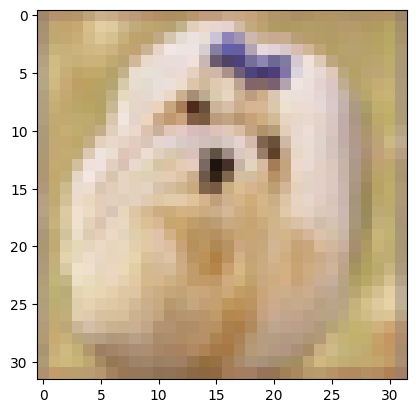

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

* Choose 1. 한꺼번에 Standardization 적용

In [ ]:
x_mean = train_x.mean()
x_std = train_x.std()
s_train_x = (train_x - x_mean) / x_std
s_test_x = (test_x - x_mean) / x_std

In [ ]:
s_train_x.mean(), s_train_x.std() # 원래 평균 0, 표준편차 1로 만들어주는 것

(-2.5247951877342226e-17, 1.0000000000000022)

* Choose 2. 채널별로 Standardization 적용
→ 이런 식으로 해야 한다는 주장도 있긴 함

In [7]:
x_r_mean, x_r_std = train_x[:, :, :, 0].mean(), train_x[:, :, :, 0].std()
x_g_mean, x_g_std = train_x[:, :, :, 1].mean(), train_x[:, :, :, 1].std()
x_b_mean, x_b_std = train_x[:, :, :, 2].mean(), train_x[:, :, :, 2].std()

In [8]:
s_train_x_r = ( train_x[:, :, :, 0] - x_r_mean) / x_r_std
s_train_x_g = ( train_x[:, :, :, 1] - x_g_mean) / x_g_std
s_train_x_b = ( train_x[:, :, :, 2] - x_b_mean) / x_b_std

In [9]:
s2_train_x = np.stack((s_train_x_r, s_train_x_g, s_train_x_b), axis=3)

In [10]:
s_test_x_r = ( test_x[:, :, :, 0] - x_r_mean) / x_r_std
s_test_x_g = ( test_x[:, :, :, 1] - x_g_mean) / x_g_std
s_test_x_b = ( test_x[:, :, :, 2] - x_b_mean) / x_b_std

In [11]:
s_test_x_r.shape

(10000, 32, 32)

In [12]:
s2_test_x = np.stack((s_test_x_r, s_test_x_g, s_test_x_b), axis=3)

In [ ]:
s2_test_x.shape

(10000, 32, 32, 3)

### Y : One-Hot Encoding

In [ ]:
n = len(np.unique(train_y))
n

10

In [ ]:
from keras.utils import to_categorical

train_y = to_categorical(train_y, n)
test_y = to_categorical(test_y, n)

### 코드를 완성해주세요!

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [ ]:
from keras.backend import clear_session
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.models import Sequential, Model

#### Sequential API

In [ ]:
clear_session()

model = Sequential()
# 인풋레이어
model.add(Input(shape=(32, 32, 3)))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 strides=(1,1),
                 activation='relu'))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 strides=(1,1),
                 activation='relu'))
# BatchNormalization
model.add(BatchNormalization())
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(MaxPool2D(pool_size=(2, 2),
                    strides=(2, 2)))
# DropOut : 25% 비활성화
model.add(Dropout(0.25))
# Convolution : 필터수 64, 사이즈(3, 3), same padding
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 strides=(1,1),
                 activation='relu'))
# Convolution : 필터수 64, 사이즈(3, 3), same padding
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 strides=(1,1),
                 activation='relu'))
# BatchNormalization
model.add(BatchNormalization())
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(MaxPool2D(pool_size=(2, 2),
                    strides=(2, 2)))
# DropOut : 25% 비활성화
model.add(Dropout(0.25))
# Flatten( )
model.add(Flatten())
# Fully Connected Layer : 노드 1024개
model.add(Dense(1024, activation='relu'))
# BatchNormalization
model.add(BatchNormalization())
# DropOut : 35% 비활성화
model.add(Dropout(0.35))
# 아웃풋레이어
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,626 (16.31 MB)

 Trainable params: 4,273,386 (16.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

#### Functional API

In [ ]:
clear_session()

# 인풋레이어
il = Input(shape=(32, 32, 3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(il)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size = (2, 2),
               strides = (2, 2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# Convolution : 필터수 64, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size = (2, 2),
               strides = (2, 2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation = 'relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(10, activation = 'softmax')(hl)

model = Model(il, ol)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,626 (16.31 MB)

 Trainable params: 4,273,386 (16.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

#### 모델 학습

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0,
    verbose = 1,
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(s_train_x, train_y, epochs=10000, validation_split=.2, verbose=1, callbacks=[es], batch_size=128).history

Epoch 1/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.4031 - loss: 1.9479 - val_accuracy: 0.1682 - val_loss: 8.8154
Epoch 2/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6141 - loss: 1.0962 - val_accuracy: 0.6209 - val_loss: 1.1462
Epoch 3/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6885 - loss: 0.8832 - val_accuracy: 0.6812 - val_loss: 0.9274
Epoch 4/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7315 - loss: 0.7589 - val_accuracy: 0.7359 - val_loss: 0.7632
Epoch 5/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7809 - loss: 0.6355 - val_accuracy: 0.7342 - val_loss: 0.8046
Epoch 6/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7961 - loss: 0.5658 - val_accuracy: 0.7258 - val_loss: 0.8566
Epoch 7/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8210 - loss: 0.5038 - val_accuracy: 0.7701 - val_loss: 0.7057
Epoch 8/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8442

### 성능 평가

In [ ]:
performance_test = model.evaluate(s_test_x, test_y)

print( f'Test Loss : {performance_test[0]:.6f}, Test Accuracy : {performance_test[1]*100:.3f}%' )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7843 - loss: 0.7148
Test Loss : 0.716602, Test Accuracy : 78.060%


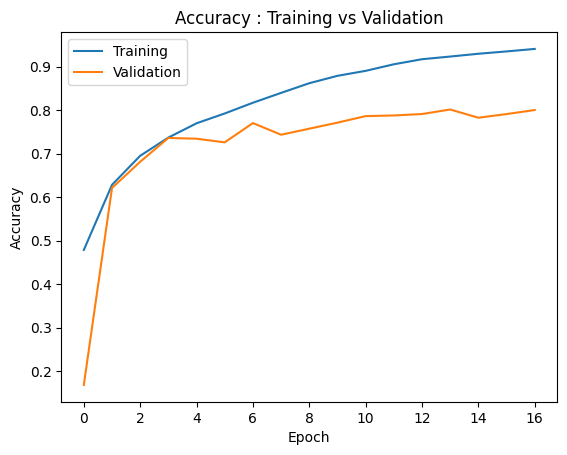

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

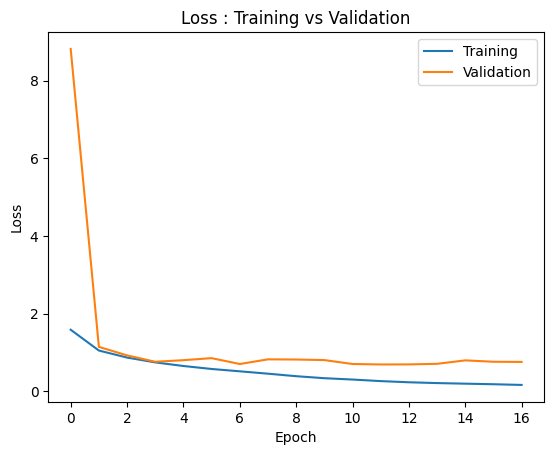

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
# 원핫 인코딩 해제
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [ ]:
pred_train = model.predict(s_train_x)
pred_test = model.predict(s_test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN
트레이닝 정확도 : 93.75%
테스트 정확도 : 78.06%


id = 2765
다음 그림은 Truck 입니다.
모델의 예측 : Truck
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 2.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 5.0, 'Truck': 91.0}
정답입니다


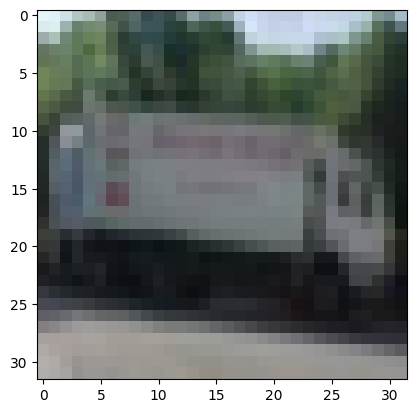

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 1480
다음 그림은 Automobile 입니다.
모델의 예측 : Truck
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 2.0, 'Bird': 0.0, 'Cat': 12.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 19.0, 'Truck': 64.0}
틀렸어요


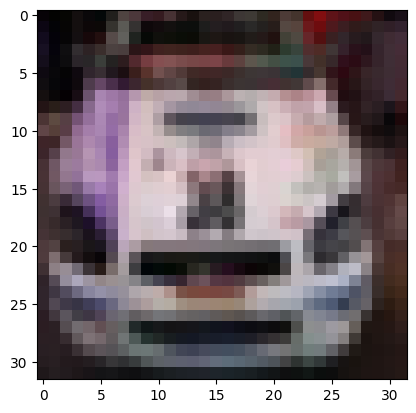

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()